In [141]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from sklearn.neighbors import KDTree

from main import Branch, Individual, Field


* Use SAR
  * Find relation between number of species and area
* Use EAR
  * Find relation between number of extinctions and decreasing area

In [142]:
t = [-0.01, -0.03, -0.05, -0.10, -0.15, -0.20, -0.25, -0.30, -0.40, -0.50, -0.60, -0.65]
alpha = list(map(lambda o: 2**o, t))
species_alpha = [o for o in alpha for i in range(1)]

m = 14
l = 10
delta0 = 0.1
delta_diff = 8
d = 5
L_av = 20

In [143]:
grid = Field(
    species_alpha=species_alpha,
    m=m,
    l=l,
    delta0=delta0,
    delta_diff=delta_diff,
    d=d,
    L_av=20
)

In [144]:
species = grid.points
for i in range(len(species)):
    print(f"Species {i} with alpha={round(species_alpha[i], 3)} has {len(species[i])} individuals.")

Species 0 with alpha=0.993 has 15262 individuals.
Species 1 with alpha=0.979 has 13396 individuals.
Species 2 with alpha=0.966 has 10165 individuals.
Species 3 with alpha=0.933 has 4983 individuals.
Species 4 with alpha=0.901 has 2981 individuals.
Species 5 with alpha=0.871 has 1842 individuals.
Species 6 with alpha=0.841 has 1167 individuals.
Species 7 with alpha=0.812 has 2172 individuals.
Species 8 with alpha=0.758 has 138 individuals.
Species 9 with alpha=0.707 has 16 individuals.
Species 10 with alpha=0.66 has 31 individuals.
Species 11 with alpha=0.637 has 11 individuals.


In [145]:
all_points = [p for species in grid.points for p in species]
x_coords = [p.x for p in all_points]
y_coords = [p.y for p in all_points]

x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)
origin = ((x_min + x_max)/2, (y_min + y_max)/2)

print(x_min, x_max, y_min, y_max)

-7.4353341294828335 9.88523544479044 -10.962323365061101 9.317946349117573


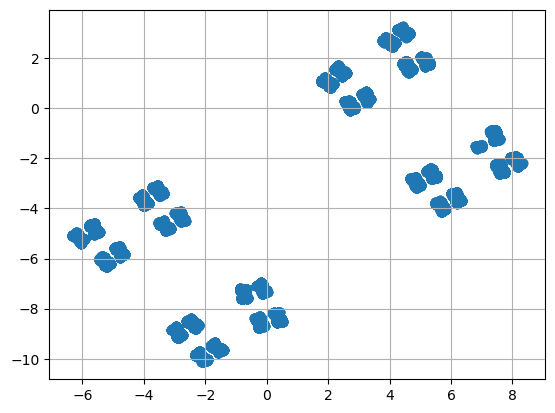

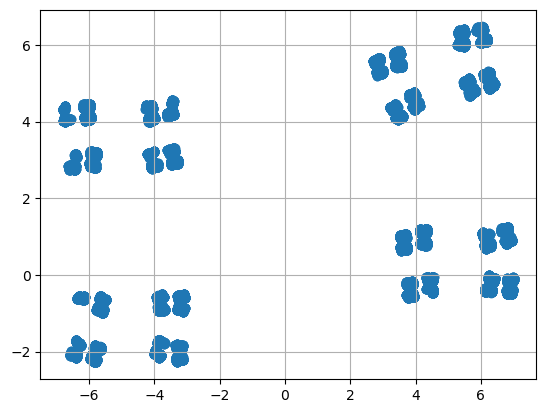

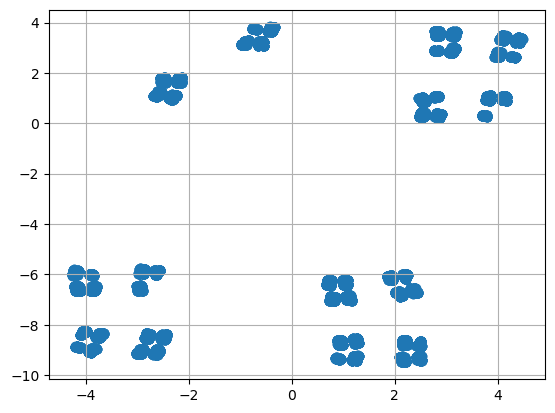

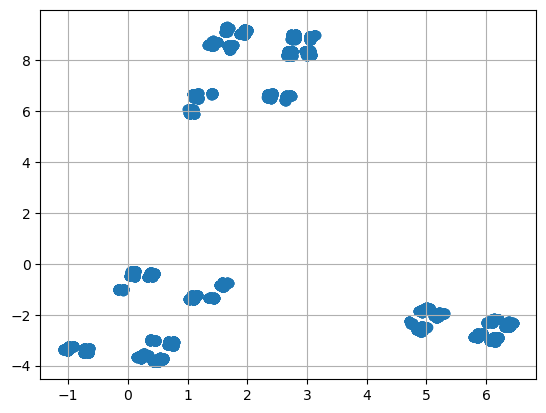

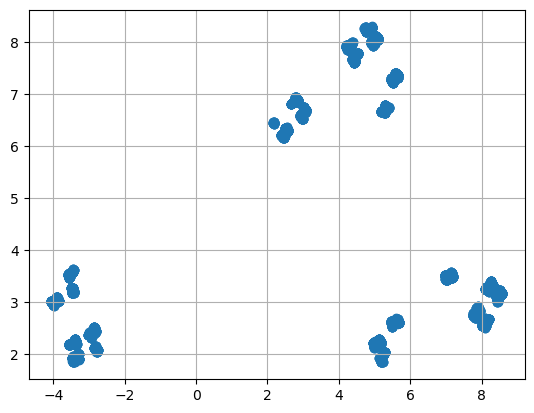

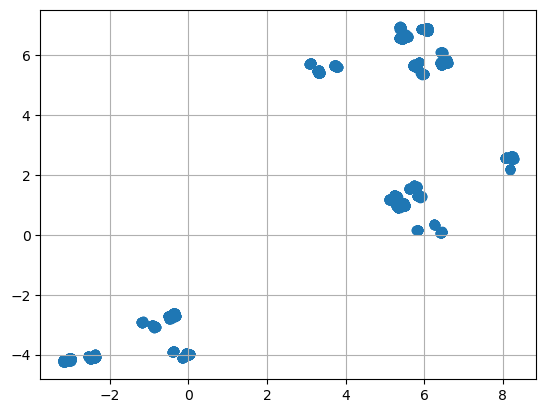

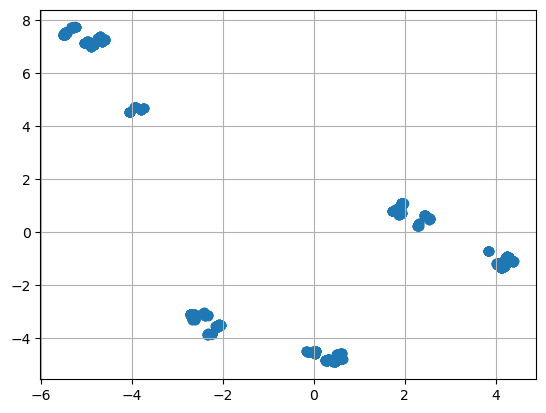

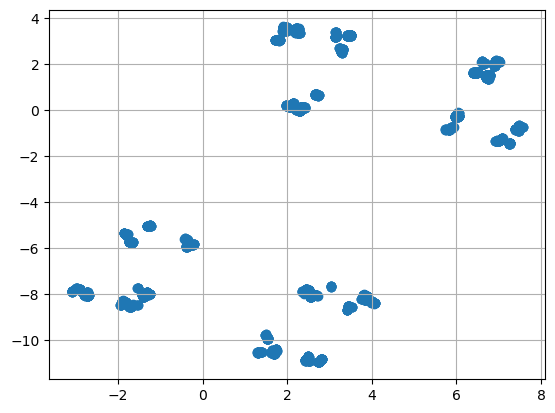

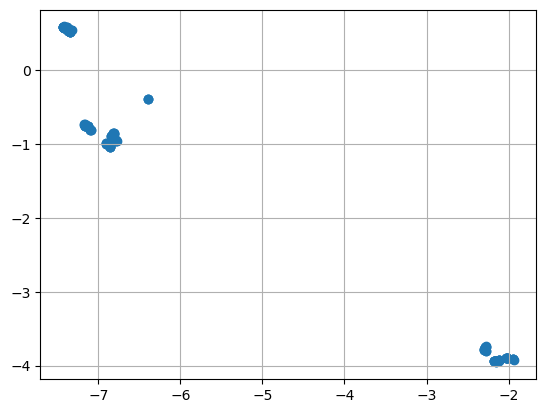

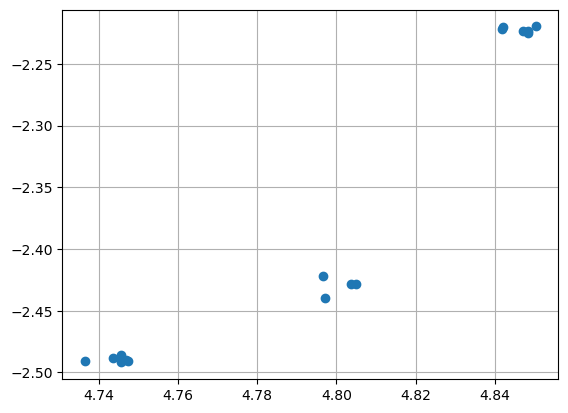

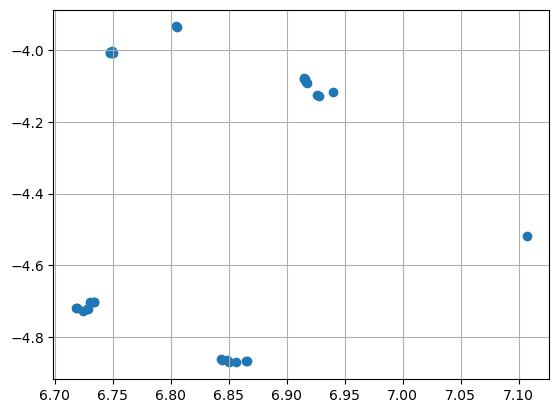

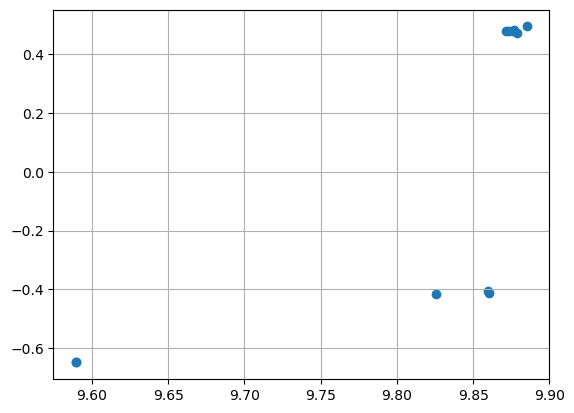

In [146]:
for processed_points in grid.points:
    x_scatter, y_scatter = zip(*map(lambda point: (point.x, point.y), processed_points))
    plt.scatter(x_scatter, y_scatter)
    plt.grid(True)
    plt.show()
# plt.savefig("./test.png")
# plt.clf()

In [147]:
# r_min = 0.5
# r_max = 50.0
# num_bins = 25
# r_bins = np.logspace(np.log10(r_min), np.log10(r_max), num_bins + 1)
# r_centers = 0.5 * (r_bins[:-1] + r_bins[1:])

In [148]:
# gs = grid.all_pair_correlation(r_bins, l * l)
# plt.clf()
# plt.loglog(r_centers, gs, 'o-')
# plt.xlabel("r")
# plt.ylabel("g(r)")
# plt.grid(True)
# plt.show()
# # plt.savefig("rho.png")

In [149]:
# r = l / (2 ** (m/2))
# r = 5.0


In [150]:
# s_c = grid.s(r_max)

In [151]:
# print(s_c)

In [152]:
# L_max = max(x_max - x_min, y_max - y_min)
# L_list = np.logspace(np.log10(2*r), np.log10(L_max), 20)
# A_list = [L**2 for L in L_list]

In [153]:
# S_list = []

# for L in L_list:
#     S_L = grid.s(r, L, origin)
#     S_list.append(S_L)

Determine S_C

In [154]:
# S_matrix = []
# for _, species in enumerate(grid.points):
#     S_list = []
#     for L in L_list:
#         origin = ((min(p.x for p in species) + max(p.x for p in species))/2,
#                   (min(p.y for p in species) + max(p.y for p in species))/2)
#         S_list.append(grid.s(r, L, origin))
#     S_matrix.append(S_list)


In [155]:
# print(S_matrix)

In [156]:
# plt.figure()
# plt.loglog(A_list, S_list, 'o-')
# plt.xlabel(r"log($A$)")
# plt.ylabel(r"log($S_C$)")
# plt.grid(True)
# plt.show()


In [157]:
# # number of species within area A per alpha value
# for i, S_list in enumerate(S_matrix):
#     print(f"Alpha {i}:")
#     for S in range(len(A_list)):
#         print(f"  Area {round(A_list[S], 3)} : Species count {S_list[S]}")
        

In [158]:
# plt.figure(figsize=(6,5))

# for i, S_list in enumerate(S_matrix):
#     plt.plot(np.log10(A_list), np.log10(S_list), label=f'Alpha {i}')

# plt.xlabel("log10(A)")
# plt.ylabel("log10(S_c)")
# plt.legend()
# plt.grid(True)
# plt.show()


In [159]:
r_min = 0.1
r_max = L_av / 2

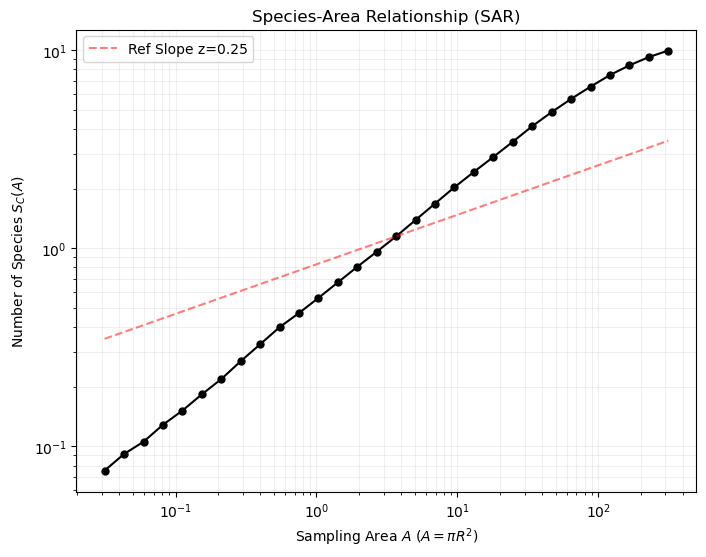

In [160]:
n_steps = 30
R_values = np.logspace(np.log10(r_min), np.log10(r_max), n_steps)

S_values = grid.species_area_curve(R_values, n_samples=2000)
# get area from radius
Area_values = np.pi * (R_values ** 2)
plt.figure(figsize=(8, 6))
plt.loglog(Area_values, S_values, 'o-', color='black', markersize=5, linewidth=1.5)

# Add reference slope line
mid_idx = len(Area_values) // 2
ref_slope = 0.25 # to be adjusted
ref_y = S_values[mid_idx] * (Area_values / Area_values[mid_idx])**ref_slope
plt.loglog(Area_values, ref_y, 'r--', label='Ref Slope z=0.25', alpha=0.5)

plt.xlabel(r"Sampling Area $A$ ($A = \pi R^2$)")
plt.ylabel(r"Number of Species $S_C(A)$")
plt.title("Species-Area Relationship (SAR)")
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.show()

Extinction-Area Relationship

In [161]:
def determine_q(q_try, fractional_area, initial_species_count):
    lhs = fractional_area * initial_species_count
    lhs = np.full_like(q_try, lhs)
    rhs = (q_try / (1 - q_try)) - ((initial_species_count + 1) * q_try ** (initial_species_count + 1)) / (1 - q_try ** (initial_species_count + 1))
    root_find = lhs - rhs

    y_closest = np.min(np.abs(root_find))
    q_closest = q_try[np.argmin(np.abs(root_find))]
    # print(f"Closest value to zero is {y_closest} at q={q_closest}")

    # plt.figure()
    # plt.plot(q_try, root_find)
    # plt.xlabel('q')
    # plt.ylabel('Value')
    # plt.grid(True)
    # plt.ylim(-10, 10)
    # plt.show()

    return q_closest


In [162]:
def extinction_probability(a, q, n_c, n_0):
    # print(a, q, n_c, n_0)
    return (q ** (n_c + 1) - 1) / (q ** (n_0 + 1) - 1)

In [163]:
q_try = np.linspace(0, 1.01, 100000)
species_initial = 1000
area_original = Area_values[-1]

critical_abundance = np.linspace(0, 100, 11)

q_array = np.empty(len(critical_abundance), dtype=object)
extinction_prob_array = np.empty(len(critical_abundance), dtype=object)

for j in range(len(critical_abundance)):
    q = np.empty(len(Area_values) - 1)
    extinction_probabilities = np.empty(len(Area_values) - 1)

    for i in range(0, len(Area_values) - 1):
        area = Area_values[i]
        fractional_area = area / area_original
        q_value = determine_q(q_try, fractional_area, species_initial)
        q[i] = q_value
        # print(f"Area: {area}, Fractional Area: {fractional_area}, q: {q_value}")
        extinction_probabilities[i] = extinction_probability(a = fractional_area,
                                                        q = q_value,
                                                        n_c = critical_abundance[j],
                                                        n_0 = species_initial)
    q_array[j] = q
    extinction_prob_array[j] = extinction_probabilities

# area_shrunk = Area_values[25]
# fractional_area = area_shrunk / area_original
# # species_initial = len(all_points)
# print(area_shrunk, area_original)
# print(fractional_area, species_initial)
# print(f"Initial area = {area_original}, Shrunk area = {area_shrunk}, Fractional area = {fractional_area}, Initial species count = {species_initial}")
# q = determine_q(q_try, fractional_area, species_initial)
# print(q)

In [164]:
# for i in range(len(Area_values) - 1):
#     print(f"Area: {Area_values[i]}, q_value = {q[i]}, Extinction Probability: {extinction_probabilities[i]}")

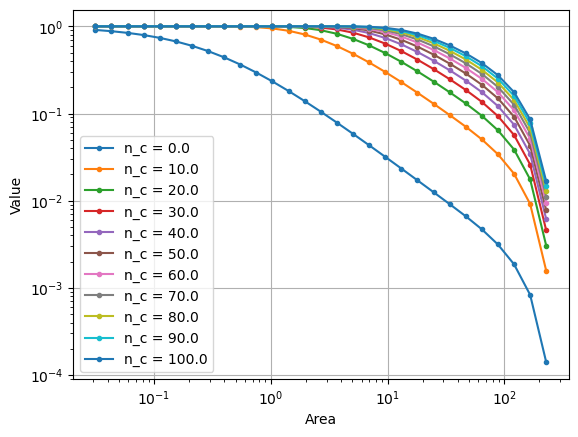

In [167]:
plt.figure()
for i in range(len(critical_abundance)):
    plt.plot(Area_values[:-1], extinction_prob_array[i], 'o-', label=f'n_c = {critical_abundance[i]}', markersize=3)

# plt.plot(Area_values[:-1], extinction_probabilities, 'o-', label='Extinction Probability', markersize=3)
# plt.plot(Area_values[:-1], q, 'o-', label='q', markersize=3)
plt.legend()
plt.xlabel("Area")
plt.ylabel("Value")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.show()